In [6]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
wine.data.shape

(178, 13)

In [8]:
# 拼接出来wine的一张表
import pandas as pd 
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis =1).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
print(wine.feature_names)
print("---------")
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
---------
['class_0' 'class_1' 'class_2']


In [12]:
# 分训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size =0.3,random_state = 0)

x_train.shape

(124, 13)

In [15]:
clf= tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
score

0.9444444444444444

In [21]:
from sklearn.metrics import accuracy_score

Xtrain,Ytrain,Xtest,Ytest = train_test_split(wine.data,wine.target,test_size=0.3,random_state = 0)

clf2 = tree.DecisionTreeClassifier(criterion = "entropy")
clf2 = clf2.fit(Xtrain,Xtest)
predict_test = clf2.predict(Ytrain)
score = accuracy_score(predict_test,Ytest)
score


0.9444444444444444

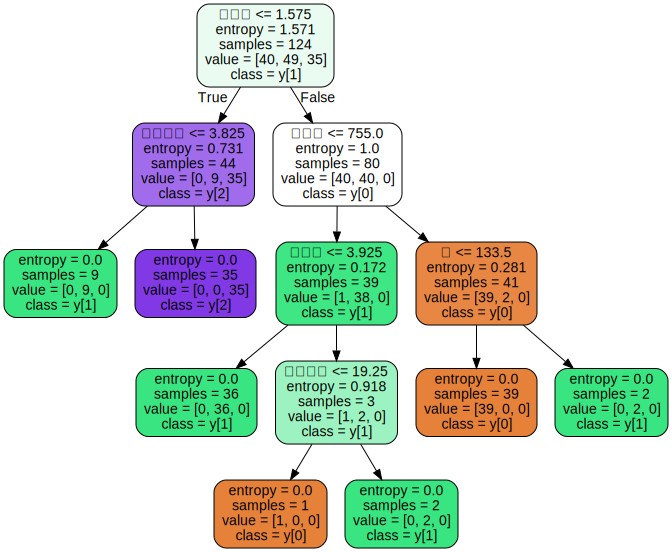

In [24]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类',
                '花青素','颜色强度','色调', 'od280/od315稀释葡萄酒','脯氨酸']
import graphviz

dot_data = tree.export_graphviz(clf,
                               out_file =None,
                                feature_names = feature_name,
                                class_names = True,
                                filled = True,
                                rounded = True
                               )
graph = graphviz.Source(dot_data)
graph

In [26]:
# 特征重要性
clf.feature_importances_

array([0.        , 0.02030084, 0.        , 0.01414231, 0.05918425,
       0.        , 0.42421878, 0.        , 0.        , 0.1650984 ,
       0.        , 0.        , 0.31705542])

In [27]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.02030084009602607),
 ('灰', 0.0),
 ('灰的碱性', 0.01414231223429707),
 ('镁', 0.059184249461736185),
 ('总酚', 0.0),
 ('类黄酮', 0.4242187763407541),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.16509839982151525),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.3170554220456714)]

In [29]:
clf = tree.DecisionTreeClassifier(criterion = "entropy",random_state = 30)
clf = clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
score

0.9629629629629629

In [33]:
clf =  tree.DecisionTreeClassifier(criterion = 'entropy' ,
                                  random_state = 3,
                                   splitter = "random"
                                  )

clf = clf.fit(x_train,y_train)
score = clf.score(x_train,y_train)

score

1.0

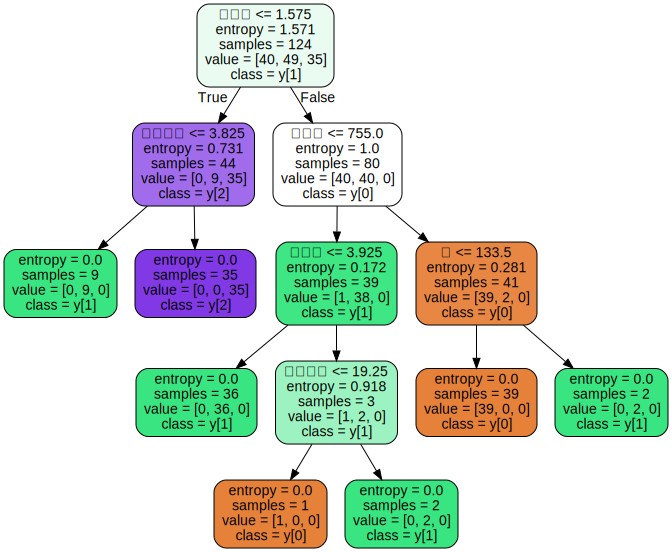

In [38]:
import graphviz
dot_tree = tree.export_graphviz(clf,
                               feature_names = feature_name,
                                class_names = ["琴酒","雪莉","贝尔摩德"],
                                filled = True,
                                rounded= True
                                
                               )
graph = graphviz.Source(dot_data)
graph

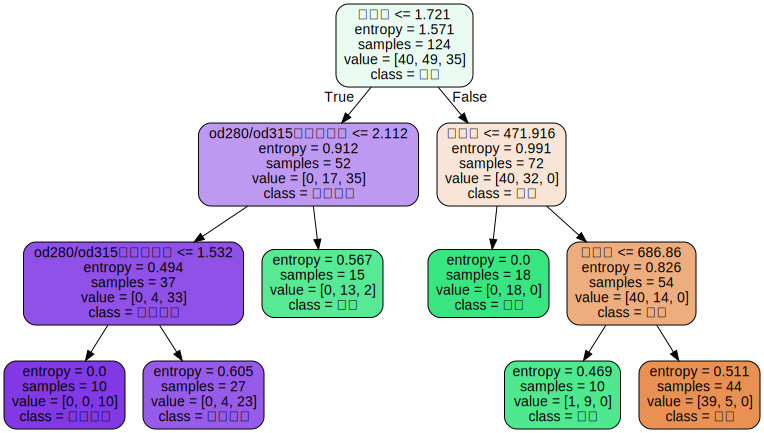

In [42]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',
                                 random_state = 30,
                                  splitter = 'random',
                                  max_depth =3,
                                  min_samples_leaf = 10,
                                  min_samples_split =10
                                 )
clf = clf.fit(x_train,y_train)

dot_data = tree.export_graphviz(clf,
                                feature_names = feature_name,
                                class_names = ["琴酒","雪莉","贝尔摩德"],
                                filled = True,
                                rounded = True

)
graph = graphviz.Source(dot_data)
graph

In [43]:
clf.score(x_train,y_train)

0.9032258064516129

In [44]:
clf.score(x_test,y_test)

0.9074074074074074

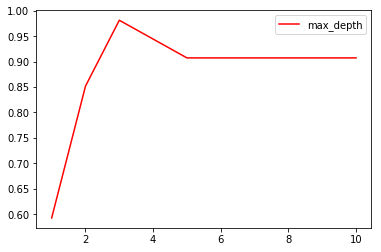

In [47]:
# 确定最优的剪枝参数

import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i+1,
                                     criterion = 'entropy',
                                      random_state = 30,
                                      splitter = "random"
                                     )
    clf = clf.fit(x_train,y_train)
    score = clf.score(x_test,y_test)
    test.append(score)
    
plt.plot(range(1,11),test,color = "red",label = "max_depth")
plt.legend()
plt.show()

## 回归树的流程

In [49]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
regressor =DecisionTreeRegressor(random_state = 0)
# 交叉验证 cross_val_score的用法
cross_val_score(regressor,boston.data,boston.target,cv=10,
               scoring = "neg_mean_squared_error")

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# 确定随机种子
rng =np.random.RandomState(1)
# 确定随机数并及进行排序
x = np.sort(5*rng.rand(80,1),axis =0)
# .ravel()表示将二维将成一维
y =np.sin(x).ravel()
# y[::5] += 3*(0.5-rng.rand(16))

regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 3)
regr_1.fit(x,y)
regr_2.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

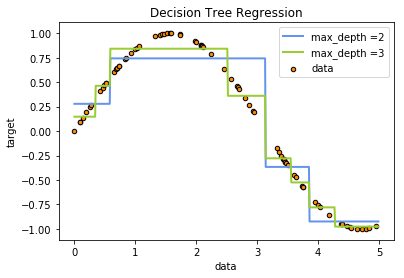

In [11]:
# np.newaxis的用法：增维切片
x_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)


plt.figure()
plt.scatter(x,y,s =20,edgecolor='black',c = 'darkorange',label ='data')
plt.plot(x_test,y_1,color="cornflowerblue",label = "max_depth =2",linewidth =2)
plt.plot(x_test,y_2,color="yellowgreen",label ="max_depth =3",linewidth =2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [55]:
# np.random.rand(数组结构)，生成随机数数组
np.random.random((2,1))
np.random.random((2,1)).ravel()
np.random.random((2,1)).ravel().shape

array([[0.37042447],
       [0.36225159]])